# Uploading Libraries

In [4]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [5]:
#run before importing Kmeans
import os
os.environ["OMP_NUM_THREADS"] = '1'

# Uploading Dataset

In [7]:
# Uploading the dataset
dataset = pd.read_csv('sku_data.csv')

# Exploratory Data Analysis

In [9]:
# Displaying the number of instances and features of the dataset
dataset.shape

(2279, 8)

In [10]:
# Displaying the first 5 rows of the dataset
dataset.head()

,ID,Unitprice,Expire date,Outbound number,Total outbound,Pal grossweight,Pal height,Units per pal
0,1,0.058,547,9,2441.0,105.60,1.56,1920
1,2,0.954,547,0,0.0,207.68,1.00,384
2,3,2.385,547,12,23.0,165.78,1.02,108
3,4,5.100,547,0,0.0,221.04,1.05,72
4,5,0.000,547,0,0.0,0.00,0.00,0


In [11]:
# Displaying the last 5 rows of the dataset
dataset.tail()

,ID,Unitprice,Expire date,Outbound number,Total outbound,Pal grossweight,Pal height,Units per pal
2274,2275,0.0,0,0,0.0,2.70,0.0,10
2275,2276,0.0,0,1,1.0,9.58,0.0,1
2276,2277,0.0,0,0,0.0,38.36,0.0,4
2277,2278,0.0,0,1,1.0,25.11,0.0,3
2278,2279,0.0,547,76,1570.0,105.60,0.0,1920


In [12]:
# Displaying the properties of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2279 entries, 0 to 2278
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2279 non-null   int64  
 1   Unitprice        2279 non-null   float64
 2   Expire date      2279 non-null   int64  
 3   Outbound number  2279 non-null   int64  
 4   Total outbound   2279 non-null   float64
 5   Pal grossweight  2279 non-null   float64
 6   Pal height       2279 non-null   float64
 7   Units per pal    2279 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 142.6 KB


In [13]:
# Displaying the descriptive statistic of the dataset
dataset.describe()

,ID,Unitprice,Expire date,Outbound number,Total outbound,Pal grossweight,Pal height,Units per pal
count,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000
mean,1140.000000,4.269402,410.371654,235.976305,731.701053,192.939582,0.672798,755.563405
std,658.034953,14.449000,240.875419,700.230685,2146.029848,164.616813,0.552117,6278.437915
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,570.500000,0.000000,365.000000,0.000000,0.000000,60.000000,0.000000,32.000000
50%,1140.000000,1.293800,547.000000,1.000000,3.000000,167.680000,0.840000,108.000000
75%,1709.500000,4.545000,547.000000,45.000000,419.500000,277.560000,1.020000,384.000000
max,2279.000000,518.592000,734.000000,6325.000000,26411.000000,907.200000,2.160000,200000.000000


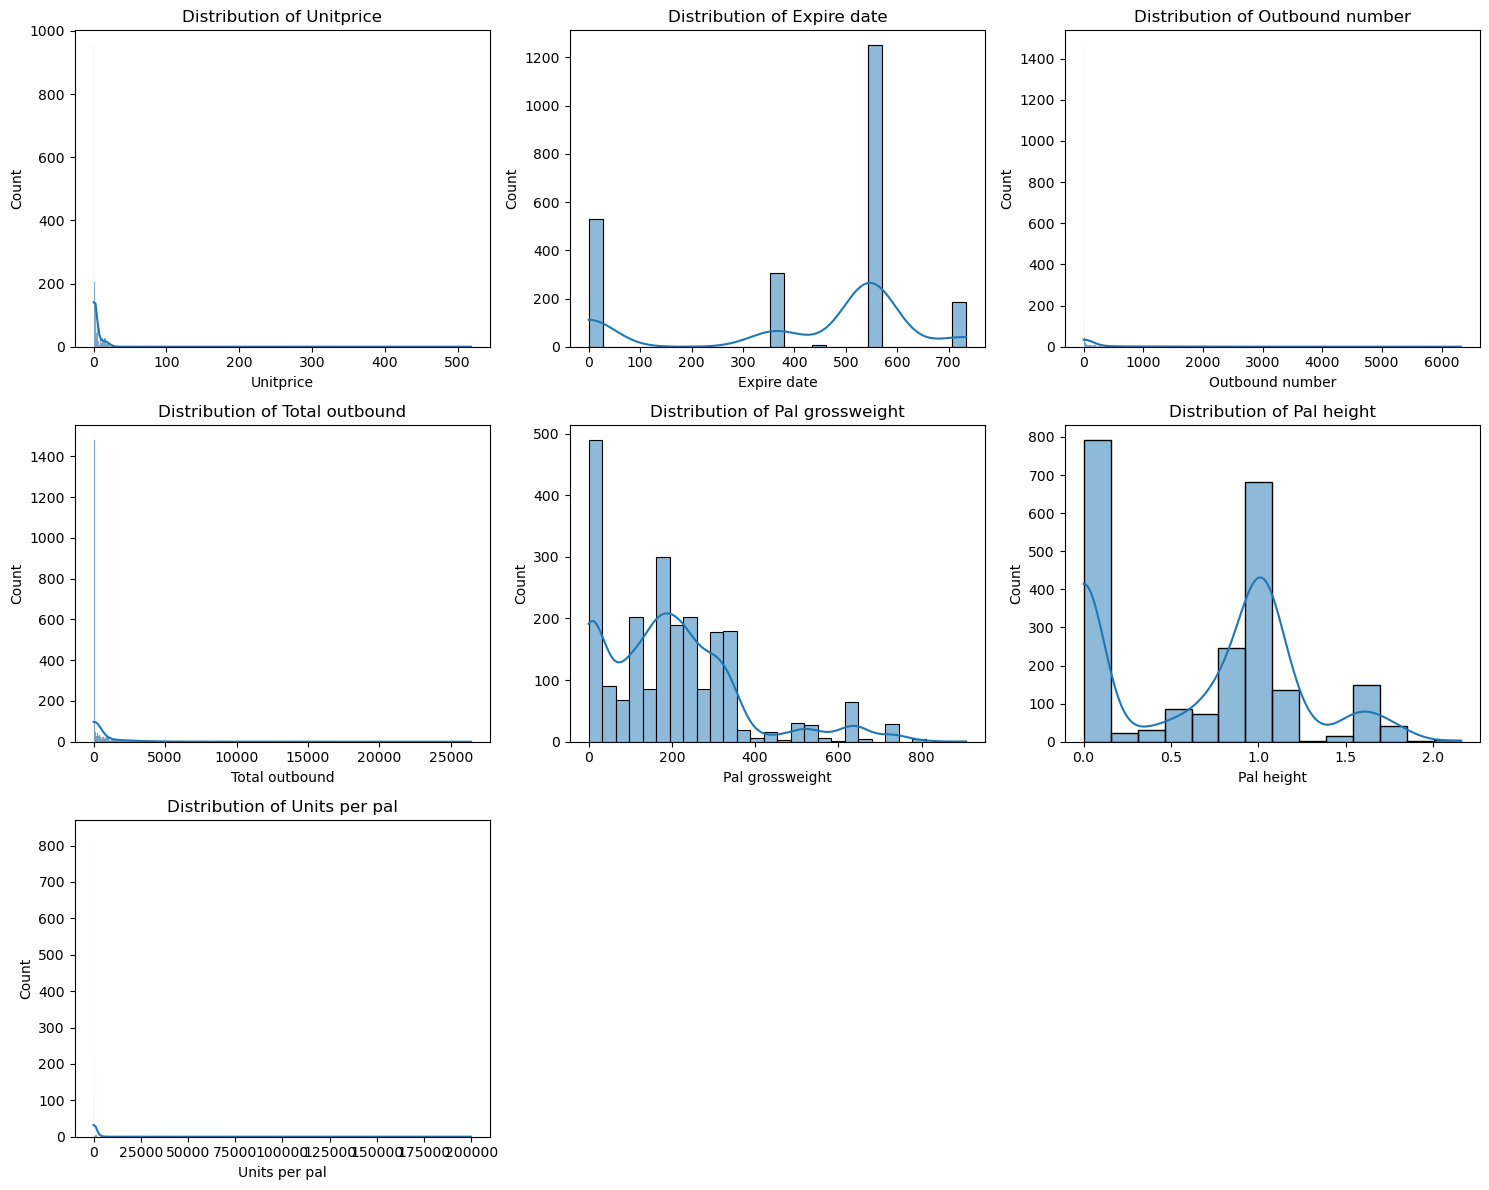

In [14]:
# Plotting histograms for the features to understand their distributions
new_dataset = dataset.columns.drop('ID')

plt.figure(figsize=(15, 12))
for i, col in enumerate(new_dataset, 1):
    plt.subplot(3, 3, i)
    sns.histplot(dataset[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

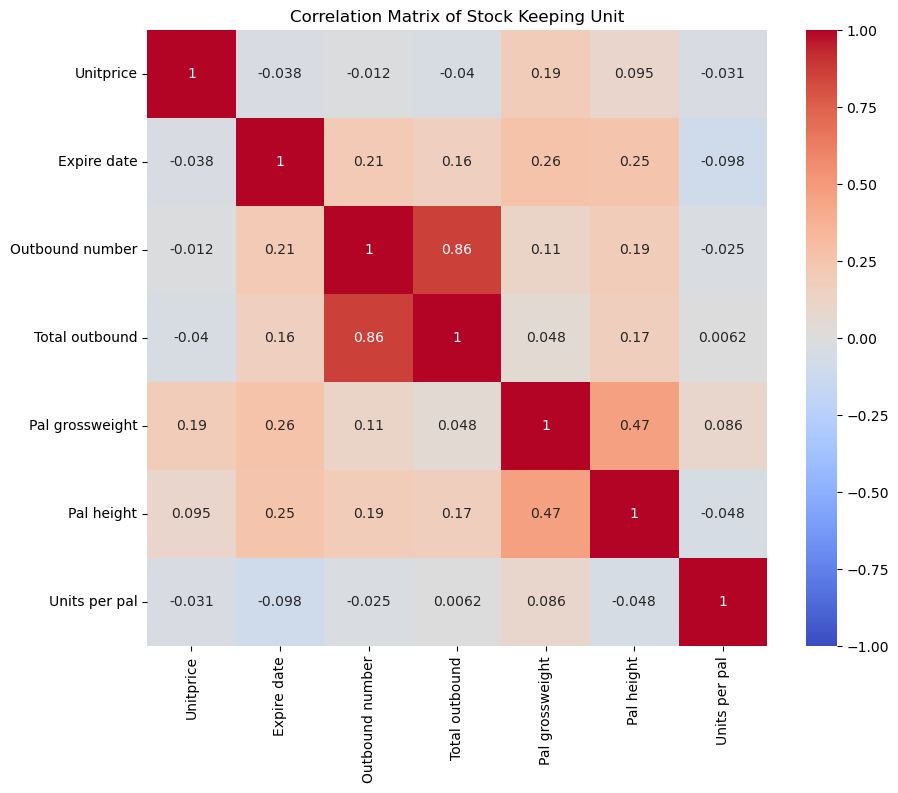

In [15]:
# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = dataset[new_dataset].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Stock Keeping Unit")
plt.show()

In [16]:
# Dimentionality reduction
dataset=dataset.drop_duplicates()
del dataset['ID']
del dataset['Total outbound']

In [17]:
# Displaying the first 5 rows of the new dataset
dataset.head()

,Unitprice,Expire date,Outbound number,Pal grossweight,Pal height,Units per pal
0,0.058,547,9,105.60,1.56,1920
1,0.954,547,0,207.68,1.00,384
2,2.385,547,12,165.78,1.02,108
3,5.100,547,0,221.04,1.05,72
4,0.000,547,0,0.00,0.00,0


In [18]:
# Displaying the properties of the new dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2279 entries, 0 to 2278
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unitprice        2279 non-null   float64
 1   Expire date      2279 non-null   int64  
 2   Outbound number  2279 non-null   int64  
 3   Pal grossweight  2279 non-null   float64
 4   Pal height       2279 non-null   float64
 5   Units per pal    2279 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 107.0 KB


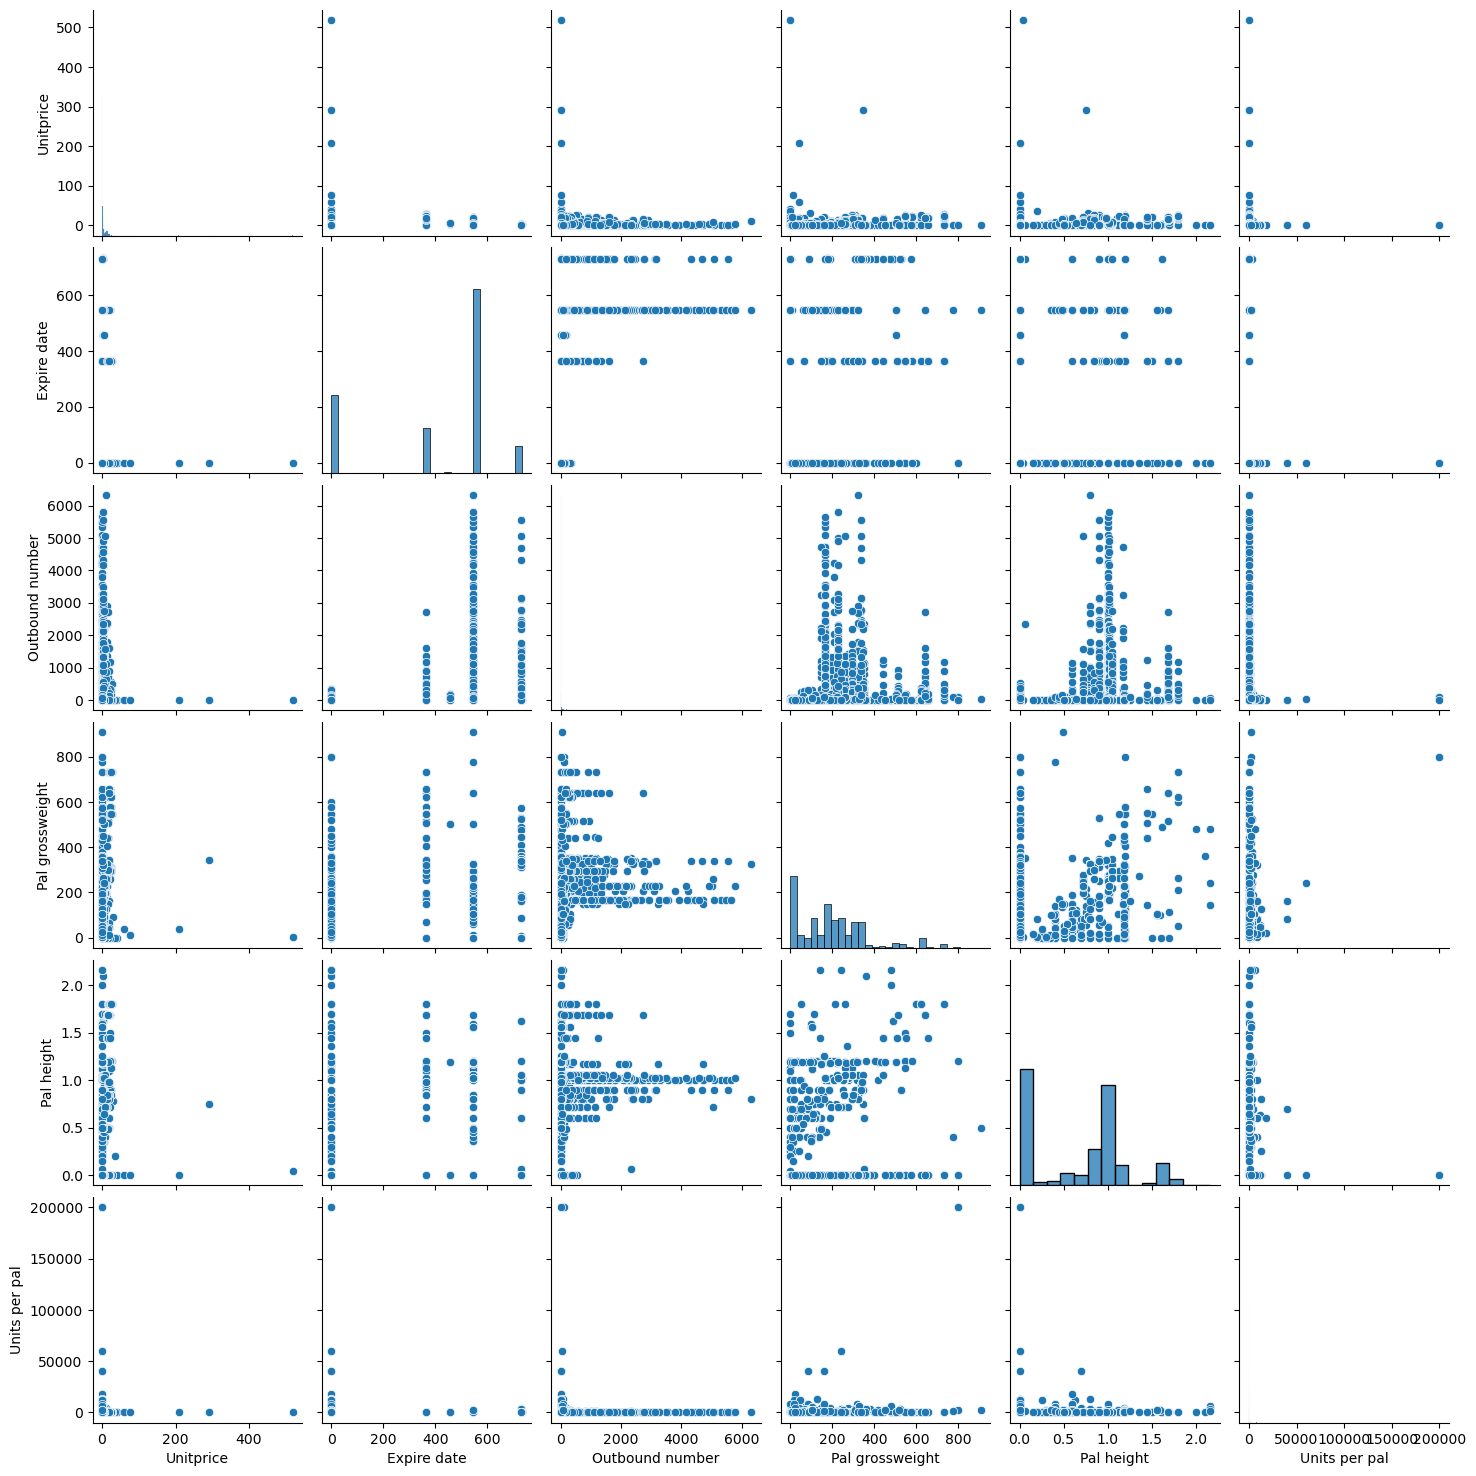

In [19]:
#Visualizing using seaborn
sns.pairplot(dataset.iloc[:,[0,1,2,3,4,5]])

# Standardization

In [21]:
#Standardization of the dataset
X = dataset.iloc [:, [0,1,2,3,4,5]].values
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

# KMeans Clustering

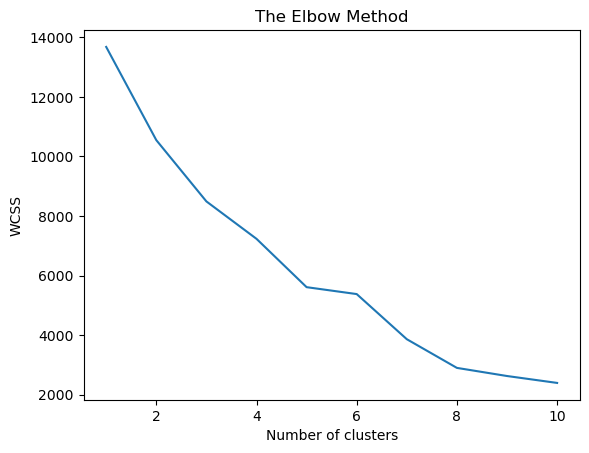

In [23]:
#Using the elbow-method to find the optimal number of clusters
wcss = []
for i in range (1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

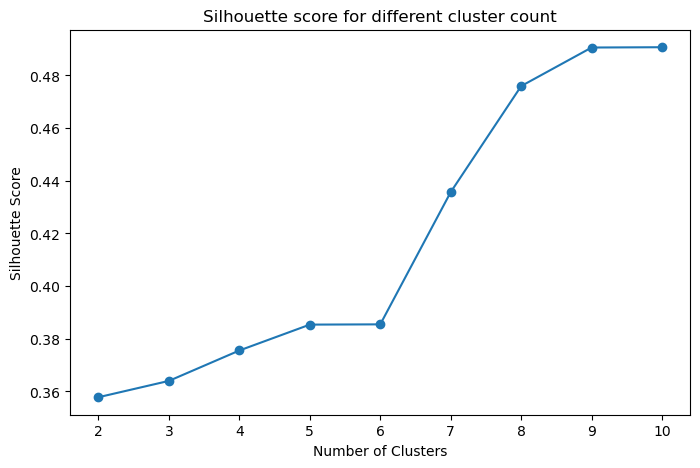

In [24]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Plot the silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette score for different cluster count')
plt.show()

In [73]:
# Apply KMeans with the chosen number of clusters
kmeans = KMeans(n_clusters=9, init = 'k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [75]:
from sklearn.decomposition import PCA

# Reducing the dimensionality before visualising
pca = PCA(n_components=4)
X_reduced = pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.30069174, 0.18721427, 0.17005472, 0.14179093])

In [77]:
sum(pca.explained_variance_ratio_)

0.7997516518215714

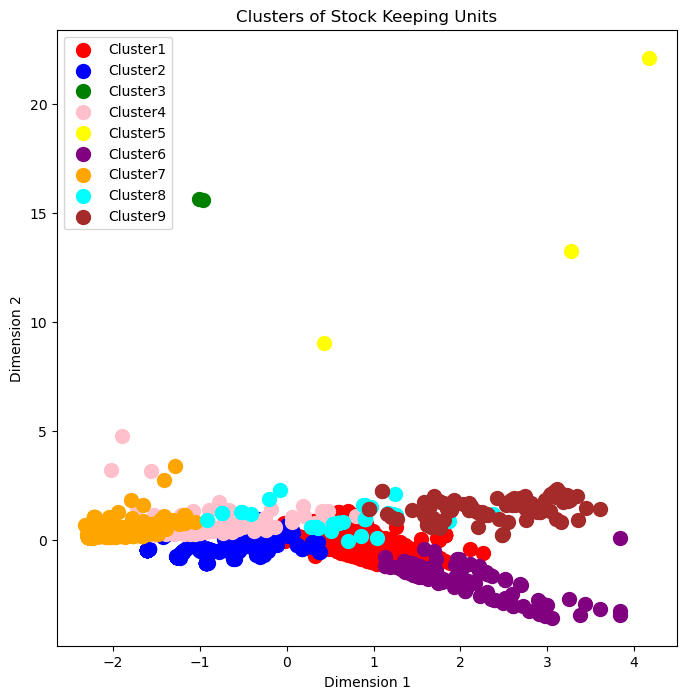

In [79]:
# Visualising the clusters
colours = ['red', 'blue','green','pink','yellow','purple', 'orange', 'cyan', 'brown']

plt.figure(figsize=(8, 8))
for i in range(9):
    plt.scatter(X_reduced[y_kmeans == i, 0], X_reduced[y_kmeans == i, 1],  
                c = colours[i], s=100, label ='Cluster' +str(i+1))
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Clusters of Stock Keeping Units')
plt.legend()
plt.show()

#  Hierarchical-Agglomerative Clustering

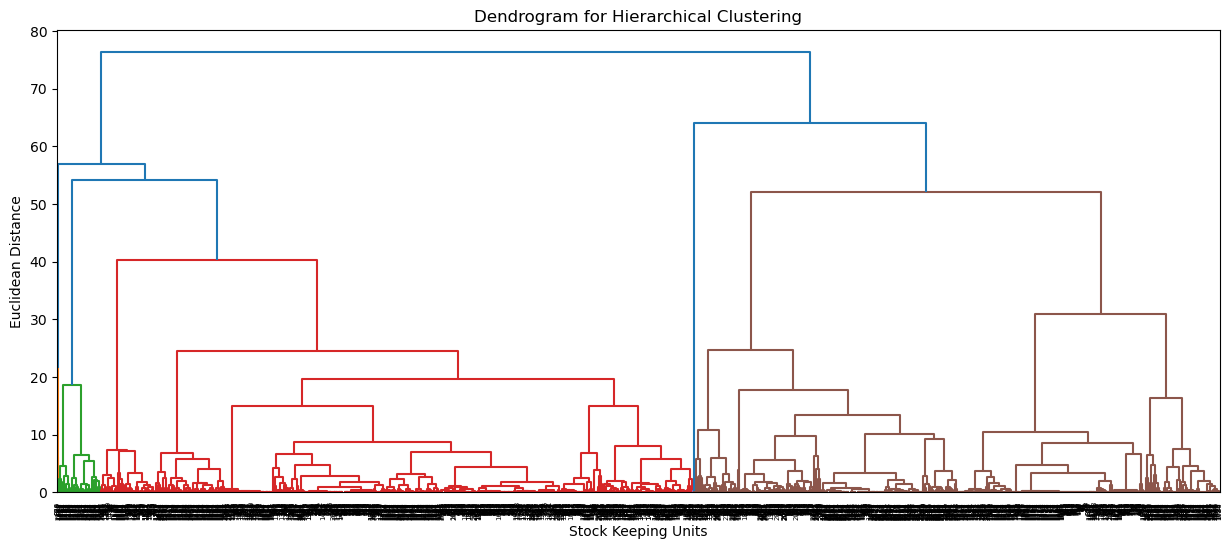

In [64]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15, 6))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Stock Keeping Units")
plt.ylabel("Euclidean Distance")
plt.show()

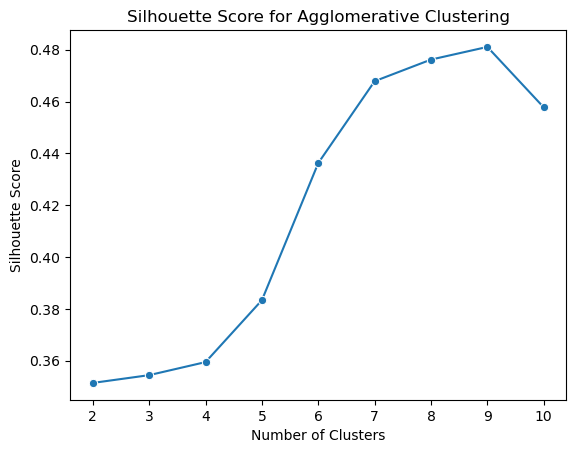

In [65]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt


silhouette_scores = []
i_range = []

for i in range(2, 11):
    agglomerative = AgglomerativeClustering(n_clusters=i).fit(X)
    labels = agglomerative.labels_
    t = silhouette_score(X, labels)
    silhouette_scores.append(t)
    i_range.append(i)

# Plotting the silhouette scores
p = sns.lineplot(x=i_range, y=silhouette_scores, marker='o')
p.set_xlabel("Number of Clusters")
p.set_ylabel("Silhouette Score")
p.set_title("Silhouette Score for Agglomerative Clustering")
plt.show()

In [66]:
from sklearn.cluster import AgglomerativeClustering
# Fitting Hierarchical Applying Agglomerative Clustering with the same number of clusters
hc = AgglomerativeClustering(n_clusters=9, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

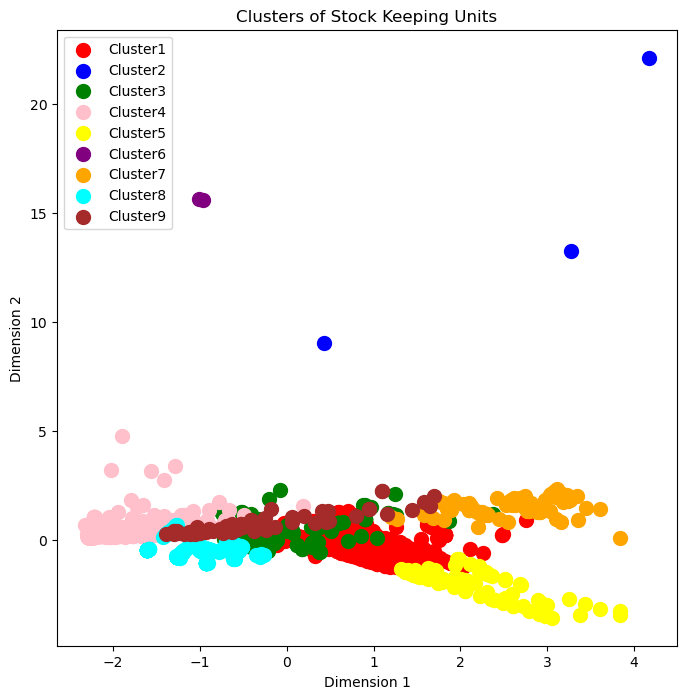

In [67]:
# Visualising the clusters
colours = ['red', 'blue','green','pink','yellow','purple', 'orange', 'cyan', 'brown']

plt.figure(figsize=(8, 8))
for i in range(9):
    plt.scatter(X_reduced[y_hc == i, 0], X_reduced[y_hc == i, 1], 
                c = colours[i], s=100, label ='Cluster' +str(i+1))
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Clusters of Stock Keeping Units')
plt.legend()
plt.show()